# 1. Einführung (Klassifikation)

# 1.1 Problemstellung

Die Vorhersage von Verkaufsperformance ist im datengetriebenen Umfeld der Automobilbranche ein zentraler Faktor. Hersteller und Händler profitieren davon, frühzeitig einschätzen zu können, ob ein Fahrzeugmodell bzw. eine spezifische Konfiguration in einer Region eher eine hohe oder niedrige Verkaufsnachfrage erzielen wird. Eine zuverlässige Klassifikation unterstützt u. a.:
bessere Planung von Lagerbeständen und Produktionsmengen,gezielte Marketingmaßnahmen (z. B. für schwächere Segmente),regionale Preis- und Angebotsstrategien,Identifikation von Eigenschaften, die hohe Verkäufe begünstigen.

In diesem Projekt entwickeln wir ein Machine-Learning-Klassifikationsmodell, das vorhersagt, ob ein BMW-Fahrzeug in die Kategorie High oder Low Sales fällt. Dazu nutzen wir Fahrzeugattribute wie Modell, Baujahr, Kilometerstand, Getriebeart, Kraftstofftyp, Motorgröße und weitere Merkmale aus dem bereitgestellten Datensatz.

Kernfrage:

Kann ein Klassifikationsmodell zuverlässig vorhersagen, ob ein Fahrzeug eine hohe oder niedrige Verkaufsperformance erzielt – basierend auf den vorhandenen Fahrzeugmerkmalen?

# 1.2 Motivation

Eine zuverlässige Sales-Klassifikation bietet Mehrwert für verschiedene Zielgruppen:
Autohändler: bessere Nachfrageeinschätzung → bessere Bestell- und Lagerentscheidungen
Marketing & Vertrieb: gezieltere Kampagnen, regionale Optimierung
Produktmanagement: Erkenntnisse darüber, welche Konfigurationen sich besonders gut verkaufen
Marktanalysten: Identifikation von Trends in Modell- und Antriebspräferenzen
Durch ML lassen sich Muster in historischen Daten erkennen, die von manueller Einschätzung häufig übersehen werden.

# 1.3 Überblick über den Datensatz

Der Datensatz enthält 50.000 Einträge und 11 Spalten:

Model → Modellreihe

Year → Baujahr

Region → Verkaufsregion

Color → Farbe

Fuel_Type → Kraftstofftyp

Transmission → Getriebeart

Engine_Size_L → Motorgröße in Liter

Mileage_KM → Kilometerstand

Price_USD → Preis

Sales_Volume → Verkaufsmenge

Sales_Classification → Zielkategorie (High / Low)


Es gibt sowohl numerische als auch kategoriale Variablen.
Bevor Modelle trainiert werden können, müssen wir Daten analysieren, aufbereiten und korrekt in eine ML-Pipeline integrieren.

# Import notwendiger Bibliotheken für das ML-Projekt

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    RocCurveDisplay
)

sns.set_theme(style="darkgrid")
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

print("Import fertig!")

Import fertig!


# 2. Daten laden und erste Exploration

In [2]:
df = pd.read_csv("BMW_Car_Sales_Classification.csv", sep=",",header=[0])
print("Successfully Imported Data!")


Successfully Imported Data!


In [3]:
# Erste fünf Zeilen zur Kontrolle anzeigen
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


# 2.1 Grundinfos

In [4]:
print("Datensatzgröße (Zeilen, Spalten):", df.shape)
df.info()

Datensatzgröße (Zeilen, Spalten): (50000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [5]:
df.describe(include='all')

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
count,50000,50000.000000,50000,50000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000
unique,11,NaN,6,6,4,2,NaN,NaN,NaN,NaN,2
top,7 Series,NaN,Asia,Red,Hybrid,Manual,NaN,NaN,NaN,NaN,Low
freq,4666,NaN,8454,8463,12716,25154,NaN,NaN,NaN,NaN,34754
mean,NaN,2017.015700,NaN,NaN,NaN,NaN,3.247180,100307.203140,75034.600900,5067.514680,NaN
std,NaN,4.324459,NaN,NaN,NaN,NaN,1.009078,57941.509344,25998.248882,2856.767125,NaN
min,NaN,2010.000000,NaN,NaN,NaN,NaN,1.500000,3.000000,30000.000000,100.000000,NaN
25%,NaN,2013.000000,NaN,NaN,NaN,NaN,2.400000,50178.000000,52434.750000,2588.000000,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.200000,100388.500000,75011.500000,5087.000000,NaN
75%,NaN,2021.000000,NaN,NaN,NaN,NaN,4.100000,150630.250000,97628.250000,7537.250000,NaN


# Histogramm:


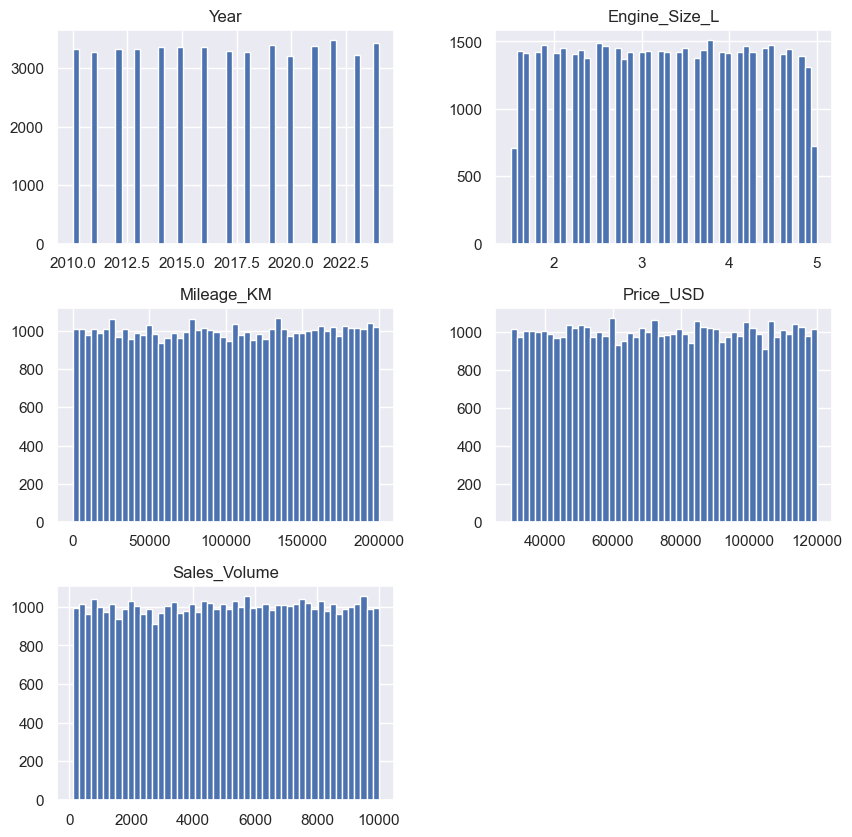

In [6]:
#Ein Histogramm zeigt die Verteilung der Werte eines Merkmals und macht sichtbar, wie häufig bestimmte Wertebereiche im Datensatz vorkommen.
df.hist(bins=50,figsize=(10,10))
plt.show()

In [7]:
df.shape
#ZeilenxSpalten 
#Beobachtungen(Autos)/Merkmale (+Target) 

(50000, 11)

# 2.2 Häufigkeiten pro Modell

In [8]:
model_counts = df["Model"].value_counts()
print(model_counts)

Model
7 Series    4666
i3          4618
i8          4606
3 Series    4595
5 Series    4592
X1          4570
X3          4497
X5          4487
M5          4478
X6          4478
M3          4413
Name: count, dtype: int64


# 3. Datenbereinigung und -vorbereitung
Bevor ein Machine-Learning-Modell trainiert werden kann, müssen Rohdaten bereinigt und in ein geeignetes Format überführt werden. Ziel der Datenbereinigung ist es, inkonsistente, unvollständige oder fehlerhafte Einträge aus dem Datensatz zu entfernen bzw. zu korrigieren, um die Modellperformance nicht zu beeinträchtigen.

Wesentliche Schritte in diesem Abschnitt sind:

- Analyse fehlender Werte

- Entfernen oder Behandeln von Null-Werten

- Entfernen von Duplikaten

- Erkennen und Behandeln von Ausreißern

- Entfernen unbrauchbarer oder redundanter Spalten

- Korrigieren von Datentypen

Nach der Bereinigung soll der Datensatz eine konsistente und verlässliche Grundlage für das Feature Engineering und das spätere Modelltraining bilden.

# 3.1 Fehlende Werte

Fehlende Werte können ein Machine-Learning-Modell erheblich beeinträchtigen.
Deshalb muss zunächst untersucht werden, in welchen Spalten Null-Werte auftreten und wie viele Einträge betroffen sind.

Im nächsten Schritt entscheiden wir, ob fehlende Werte entfernt oder ersetzt (imputiert) werden.

In [9]:
#Die Analyse zeigt, dass keine fehlenden Werte im Datensatz vorhanden sind. 
#Daher ist keine Imputation notwendig. Trotzdem wird dieser Schritt dokumentiert, 
#da fehlende Werte in realen Datensätzen häufig vorkommen und ML-Modelle negativ beeinflussen können.
df.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

# 3.2 Duplikate
Doppelte Einträge können das Modell verfälschen, da bestimmte Fahrzeuge sonst mehrfach in die Berechnung einfließen.
Deshalb prüfen wir, ob doppelte Datensätze existieren, und entfernen diese.

In [10]:
dup_count = df.duplicated().sum()
print("Duplikate:", dup_count)

df.drop_duplicates(inplace=True)
print("Duplikate nach Entfernen:", df.duplicated().sum())

Duplikate: 0
Duplikate nach Entfernen: 0


# 3.3 Erkennen und Behandeln von Ausreißern

Ausreißer können ein Modell stark verzerren, insbesondere bei Regressionsproblemen.
Zur Analyse nutzen wir Boxplots, die besonders geeignet sind, extreme Werte sichtbar zu machen.

Abhängig von der Verteilung kann entschieden werden:

Ausreißer zu behalten (wenn sie realistische Beobachtungen darstellen)
oder extreme Werte zu entfernen, um eine stabilere Modellleistung zu erreichen.
Wir analysieren zunächst die Preisverteilung.

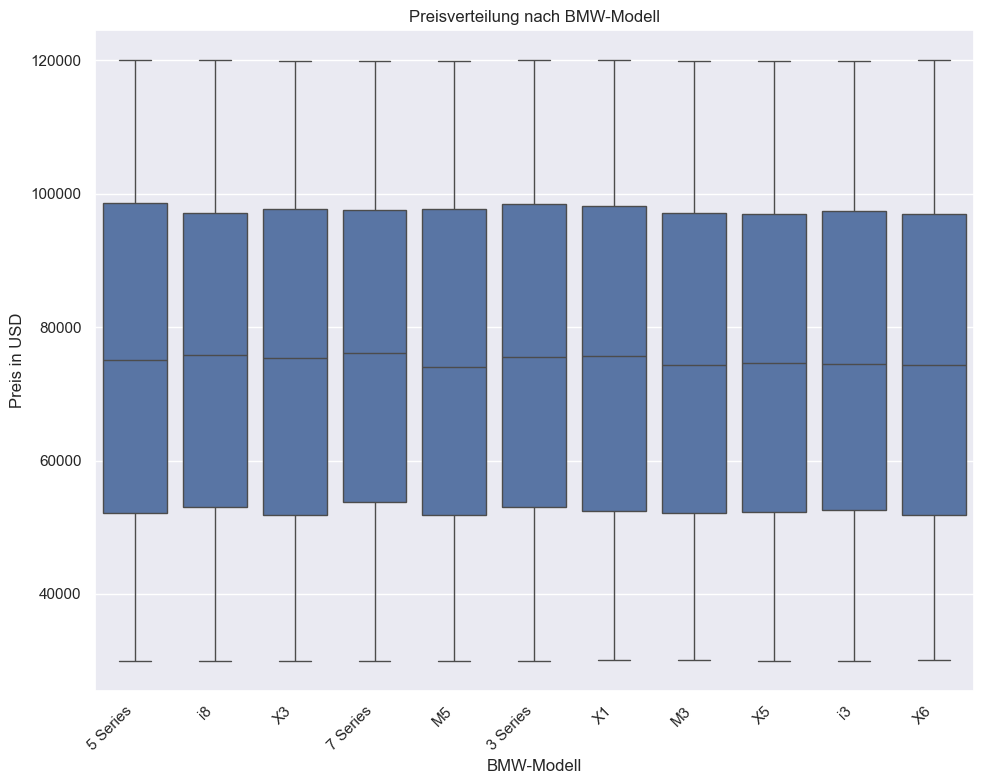

In [11]:
# --------------------------------------------------
# Preisverteilung pro BMW-Modell (Boxplot)
# --------------------------------------------------

plt.figure(figsize=(10, 8))

sns.boxplot(
    data=df,
    x="Model",
    y="Price_USD"
)

plt.xticks(rotation=45, ha="right")
plt.title("Preisverteilung nach BMW-Modell")
plt.xlabel("BMW-Modell")
plt.ylabel("Preis in USD")
plt.tight_layout()
plt.show()

# Entfernen extremer Ausreißer

Sehr hohe oder sehr niedrige Fahrzeugpreise können das Modell instabil machen.
Ein gängiger Ansatz ist das Entfernen der untersten & obersten 1 % der Preiswerte.
Dies reduziert extreme Einflüsse und führt oft zu besseren Vorhersagen.

Dieser Schritt ist nicht sinnvoll bei unserem Projekt,
da dadurch Modelle wie der M3 (hochpreisig) näher an ein Modell wie ein normaler 5er (mittelpreisig) rutscht.


# 3.4 Tabellarische Übersicht: Preisstatistiken pro BMW-Modell

In [12]:

price_table = (
    df.groupby("Model")["Price_USD"]
      .agg(
          Anzahl_Fahrzeuge="count",
          Durchschnittspreis="mean",
          Medianpreis="median",
          Minimalpreis="min",
          Maximalpreis="max"
      )
      .sort_values("Durchschnittspreis", ascending=False)
)

# Werte sinnvoll runden
price_table = price_table.round(2)

price_table

,Anzahl_Fahrzeuge,Durchschnittspreis,Medianpreis,Minimalpreis,Maximalpreis
Model,,,,,
7 Series,4666,75570.20,76093.0,30021,119978
3 Series,4595,75566.23,75461.0,30008,119994
i8,4606,75366.27,75885.5,30000,119998
5 Series,4592,75287.84,75039.0,30002,119988
X1,4570,75262.22,75610.0,30039,119996
X3,4497,75016.62,75373.0,30020,119954
M3,4413,74841.59,74313.0,30037,119960
i3,4618,74800.27,74510.5,30020,119965
X5,4487,74708.12,74599.0,30001,119973


# Fahrzeuge in einem Preisbereich

In [13]:

min_price = 79990
max_price = 80000

cars_price_range = df[
    (df["Price_USD"] >= min_price) &
    (df["Price_USD"] <= max_price)
]

cars_price_range

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
1191,X5,2019,South America,Grey,Electric,Manual,3.7,25895,79992,1777,Low
5444,M5,2018,Middle East,White,Electric,Manual,2.4,148749,79997,3101,Low
12125,7 Series,2020,Asia,Red,Electric,Manual,4.5,144342,79998,6922,Low
36907,X6,2017,Europe,Black,Hybrid,Manual,3.9,120136,79992,1129,Low
38308,i8,2010,Africa,Black,Petrol,Automatic,3.5,171034,79999,6404,Low


# 4. Explorative Analyse


# 4.1 Klassenverteilung

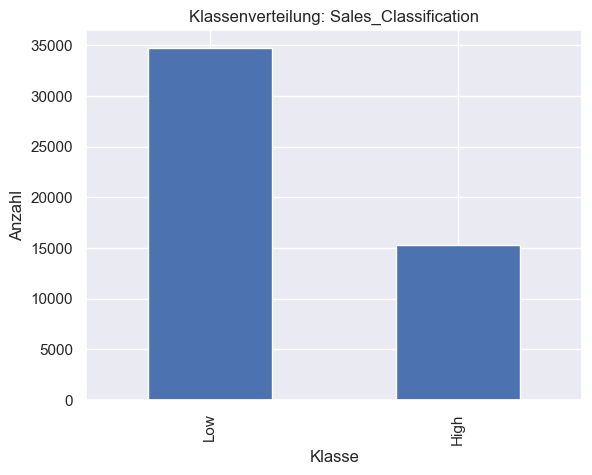

Sales_Classification
Low     0.69508
High    0.30492
Name: proportion, dtype: float64

In [14]:
ax = df["Sales_Classification"].value_counts().plot(kind="bar")
plt.title("Klassenverteilung: Sales_Classification")
plt.xlabel("Klasse")
plt.ylabel("Anzahl")
plt.show()

df["Sales_Classification"].value_counts(normalize=True)

#Interpretation:
#Die Klassenverteilung zeigt, ob das Datenset balanciert ist. 
#Ein starkes Ungleichgewicht würde besondere Maßnahmen erfordern (z. B. class_weight, SMOTE). 

#Die Klassen sind ungleich verteilt (Imbalance).
#Deshalb sind Accuracy allein und ein Modell ohne Ausgleich problematisch. 
#Maßnahmen: stratify=y beim Split und z.B. class_weight="balanced".
# Wegen Klassenungleichgewicht wird class_weight genutzt, um High-Sales stärker zu berücksichtigen

# 5. Zusammenhang Sales_Volume ↔ Sales_Classification

In [15]:
#Leakage
df.groupby("Sales_Classification")["Sales_Volume"].describe()
#Sales_Classification wird aus Sales_Volume abgeleitet. Wenn Sales_Volume als Feature genutzt wird, entsteht Target Leakage

,count,mean,std,min,25%,50%,75%,max
Sales_Classification,,,,,,,,
High,15246.0,8497.496327,866.829833,7000.0,7742.0,8491.0,9251.0,9999.0
Low,34754.0,3562.838954,1996.617951,100.0,1836.0,3579.0,5300.0,6999.0


Bei der Analyse fällt auf, dass Sales_Classification direkt über Sales_Volume getrennt ist. Die Grenze liegt bei ca. 7000 Einheiten (Low < 7000, High ≥ 7000). Das bedeutet, dass Sales_Volume die Zielvariable praktisch „verrät“. Dieser Effekt wird als Target Leakage bezeichnet.
Um eine realistische Vorhersage zu ermöglichen, werden wir deshalb zwei Experimente durchgeführt:

Experiment A (mit Sales_Volume): Demonstriert, wie unrealistisch gute Ergebnisse durch Leakage entstehen.
Experiment B (ohne Sales_Volume): Realistische Klassifikation nur anhand von Fahrzeugmerkmalen.

# 6. Feature Engineering und Vorbereitung
# 6.1 Feature: Age statt Year

In [16]:
current_year = datetime.now().year
df["Age"] = (current_year - df["Year"]).clip(lower=0)

#Begründung:
#Das Fahrzeugalter ist oft informativer als das reine Baujahr, 
#da Modelle stärker auf Alterseffekte reagieren (z. B. technischer Fortschritt, Wertverlust).

# 7. Training eines Klassifikationsmodells
# 7.1 Gemeinsame Modell-Logik (Pipeline)

Wir nutzen eine Pipeline, um:

-OneHotEncoding sauber umzusetzen,

-Skalierung nur für numerische Features anzuwenden,

-reproduzierbar zu bleiben,

-später Deployment einfacher zu machen.


# Experiment A: MIT Sales_Volume (Leakage-Demo)


# Ziel 

ein Modell bauen, das die Zielvariable

Sales_Classification ∈ {Low, High}

vorhersagt.
Das ist eine binäre Klassifikation.


In [17]:
#Zielvariable
target = "Sales_Classification"

X_A = df.drop(columns=[target])      # enthält Sales_Volume
y = df[target].map({"Low": 0, "High": 1})

#y ist die Zielvariable, aber in numerischer Form:
#Low → 0
#High → 1

#Experiment A ist bewusst mit Leakage (Sales_Volume enthalten), um zu zeigen, dass die Ergebnisse unrealistisch gut werden


In [18]:
#column list 
cat_cols_A = X_A.select_dtypes(include=["object"]).columns.tolist()
num_cols_A = [c for c in X_A.columns if c not in cat_cols_A]
print("Kategorial:", cat_cols_A)
print("Numerisch:", num_cols_A)

#Wir trennen Features nach Datentyp:
#Kategorial (object):
#Model,Region,Color,Fuel_Type,Transmission
#Numerisch:
#Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Age

#Warum ist das wichtig?
#Kategoriale Daten kann das Modell nicht direkt rechnen → müssen encodiert werden (One-Hot).
#Numerische Daten kann es rechnen → optional skalieren (besonders gut für Logistic Regression).

Kategorial: ['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission']
Numerisch: ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume', 'Age']


In [19]:
#Preprocessing + Modell
#Die Preprocessing-Pipeline macht parallel 2 Sachen:

#(A) Numerische Spalten skalieren
#StandardScaler() macht aus jeder numerischen Spalte:
#Mittelwert = 0
#Standardabweichung = 1
#Die Logistic Regression wird über Gewichte optimiert.

#(B) Kategoriale Spalten One-Hot-Encoden
#Beispiel: Fuel_Type = Petrol/Diesel/Hybrid
#wird zu Spalten wie:
#Fuel_Type_Petrol (0/1)
#Fuel_Type_Diesel (0/1)
#Fuel_Type_Hybrid (0/1)


preprocess_A = ColumnTransformer(
    transformers=[
        ("num", Pipeline([("scaler", StandardScaler())]), num_cols_A), 
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols_A)   #handle_unknown="ignore" bedeutet:
#Wenn später ein unbekanntes Modell auftaucht, crasht das Modell nicht, sondern ignoriert die neue Kategorie.
    ]
)

model_lr = LogisticRegression(max_iter=3000)

pipe_A = Pipeline([
    ("preprocess", preprocess_A),
    ("model", model_lr)
])

X_train, X_test, y_train, y_test = train_test_split(
    X_A, y, test_size=0.2, random_state=42, stratify=y
)

pipe_A.fit(X_train, y_train)
pred = pipe_A.predict(X_test)
proba = pipe_A.predict_proba(X_test)[:, 1]

print(classification_report(y_test, pred, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, proba))

#Wichtige Infos:

#random_state=42 → reproduzierbar (immer gleicher Split).
#stratify=y:
#garantiert, dass High/Low im Train und Test gleich verteilt sind.
#verhindert zufällige Verzerrungen.

              precision    recall  f1-score   support

           0     0.9991    0.9997    0.9994      6951
           1     0.9993    0.9980    0.9987      3049

    accuracy                         0.9992     10000
   macro avg     0.9992    0.9989    0.9991     10000
weighted avg     0.9992    0.9992    0.9992     10000

ROC-AUC: 0.9999938660724873


# Interpretation 

Das Modell erreicht in Experiment A eine nahezu perfekte Klassifikationsleistung. Für beide Klassen (Low und High) liegen Precision, Recall und F1-Score jeweils nahe bei 1.0, während die Gesamtgenauigkeit 99.92 % beträgt. Auch der ROC-AUC-Wert von 0.9999 zeigt eine nahezu perfekte Trennschärfe zwischen den beiden Klassen.

Diese außergewöhnlich hohen Werte sind jedoch nicht als realistische Prognoseleistung zu interpretieren. Der Grund liegt in der Verwendung der Variable Sales_Volume, die in direktem Zusammenhang mit der Zielvariable Sales_Classification steht. Dadurch erhält das Modell indirekt Zugriff auf die Zielinformation selbst, was als Target Leakage bezeichnet wird.

Experiment A dient daher ausschließlich als Demonstration des Leakage-Effekts. Für eine realitätsnahe Bewertung der Modellleistung ist es notwendig, diese Variable zu entfernen, was im anschließenden Experiment B umgesetzt wird.

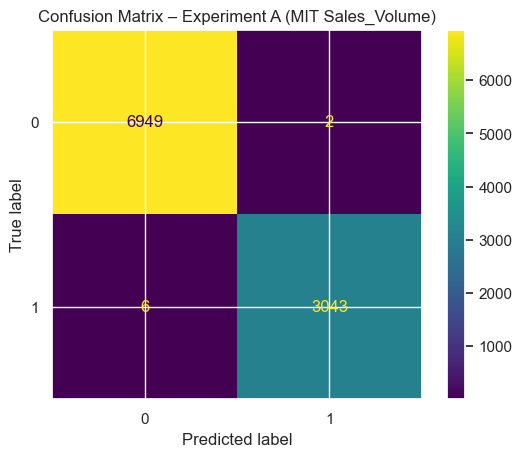

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix – Experiment A (MIT Sales_Volume)")
plt.show()

#Interpretation:
#Dieses Experiment erzielt typischerweise extrem hohe Werte, 
#da Sales_Volume die Klasse nahezu direkt bestimmt. 

#Für die Projektbewertung werden deshalb nur die Ergebnisse aus Experiment B verwendet.

# Experiment B: OHNE Sales_Volume

In [21]:
X_B = df.drop(columns=[target, "Sales_Volume"])  # Leakage entfernt
y = df[target].map({"Low": 0, "High": 1})
#Experiment B ist die realistische Modellierung, weil keine Ziel-ableitenden Variablen enthalten sind.

In [22]:
cat_cols_B = X_B.select_dtypes(include=["object"]).columns.tolist()
num_cols_B = [c for c in X_B.columns if c not in cat_cols_B]
print("Kategorial:", cat_cols_B)
print("Numerisch:", num_cols_B)

Kategorial: ['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission']
Numerisch: ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Age']


In [23]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(
    X_B, y, test_size=0.2, random_state=42, stratify=y
)

# 8. Modelle: Vergleich von 2 Klassifikatoren 
# 8.1 Modell 1: Logistic Regression 

In [24]:
preprocess_B = ColumnTransformer(
    transformers=[
        ("num", Pipeline([("scaler", StandardScaler())]), num_cols_B),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols_B)
    ]
)

lr = LogisticRegression(max_iter=3000)

pipe_lr = Pipeline([
    ("preprocess", preprocess_B),
    ("model", lr)
])

pipe_lr.fit(X_train, y_train)

pred_lr = pipe_lr.predict(X_test)
proba_lr = pipe_lr.predict_proba(X_test)[:, 1]

print("LOGISTIC REGRESSION – Experiment B (OHNE Sales_Volume)")
print(classification_report(y_test, pred_lr, digits=4, zero_division=0))
print("ROC-AUC:", roc_auc_score(y_test, proba_lr))

LOGISTIC REGRESSION – Experiment B (OHNE Sales_Volume)
              precision    recall  f1-score   support

           0     0.6951    1.0000    0.8201      6951
           1     0.0000    0.0000    0.0000      3049

    accuracy                         0.6951     10000
   macro avg     0.3476    0.5000    0.4101     10000
weighted avg     0.4832    0.6951    0.5701     10000

ROC-AUC: 0.49056609026149833


# Interpretation:
Die Logistic Regression findet in den verbleibenden Features keine lineare Trennung, 
die High zuverlässig von Low unterscheidet. Entweder ist das Signal zu schwach oder die Beziehungen sind nichtlinear bzw. die Klassen überlappen stark.

Dieses Ergebnis zeigt, dass die Logistic Regression praktisch nur eine Klasse vorhersagt, nämlich Low (0).
Recall(0)=1.0 bedeutet: Alle echten Low-Fälle wurden als Low erkannt.
Recall(1)=0.0 bedeutet: Kein einziger High-Fall wurde erkannt.
Precision(1)=0.0 entsteht, weil das Modell fast nie „High“ vorhersagt und wenn doch, dann falsch bzw. praktisch nicht.

Die Accuracy von ~69,5% zeigt auf 'Low'

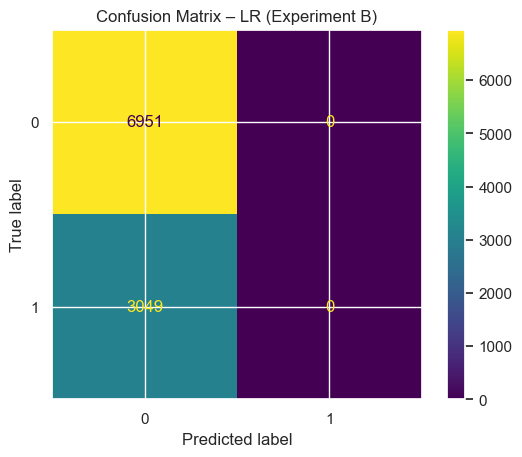

In [25]:
#Confusion Matrix + ROC
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_lr)).plot()
plt.title("Confusion Matrix – LR (Experiment B)")
plt.show()

#Die Confusion Matrix verdeutlicht, dass das Modell ohne Leakage-Variable ausschließlich die Mehrheitsklasse vorhersagt und High-Sales vollständig 
#verfehlt, was die begrenzte Aussagekraft der verbleibenden Merkmale für dieses Klassifikationsproblem bestätigt.

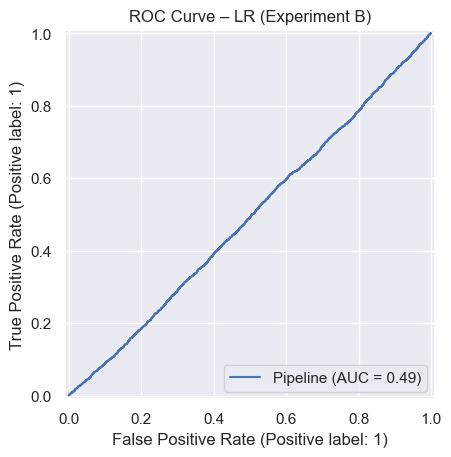

In [26]:
RocCurveDisplay.from_estimator(pipe_lr, X_test, y_test)
plt.title("ROC Curve – LR (Experiment B)")
plt.show()

# 8.2 Modell 2: Random Forest 

In [27]:
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

pipe_rf = Pipeline([
    ("preprocess", preprocess_B),  # gleiches Preprocessing
    ("model", rf)
])

pipe_rf.fit(X_train, y_train)
pred_rf = pipe_rf.predict(X_test)
proba_rf = pipe_rf.predict_proba(X_test)[:, 1]

print("RANDOM FOREST – Experiment B (OHNE Sales_Volume)")
print(classification_report(y_test, pred_rf, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, proba_rf))


RANDOM FOREST – Experiment B (OHNE Sales_Volume)
              precision    recall  f1-score   support

           0     0.6944    0.9886    0.8158      6951
           1     0.2330    0.0079    0.0152      3049

    accuracy                         0.6896     10000
   macro avg     0.4637    0.4983    0.4155     10000
weighted avg     0.5537    0.6896    0.5717     10000

ROC-AUC: 0.4959195934583833


# Interpretation
Der Random Forest zeigt in Experiment B eine starke Tendenz zur Mehrheitsklasse (Low) und verfehlt die High-Klasse nahezu vollständig. Trotz class_weight="balanced" bleibt die Trennschärfe gering (ROC-AUC ≈ 0.5), was darauf hinweist, dass die verbleibenden Merkmale ohne Sales_Volume nur geringe Information zur Vorhersage von High-Sales enthalten.

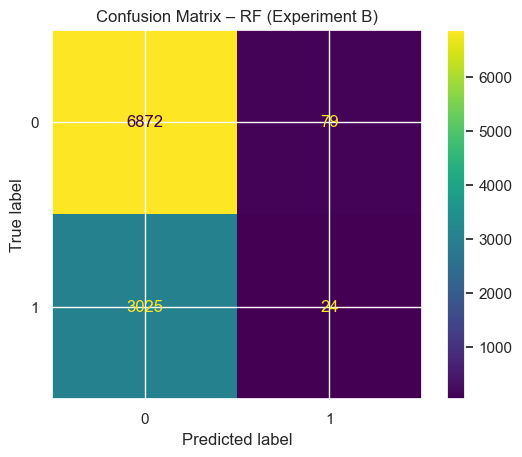

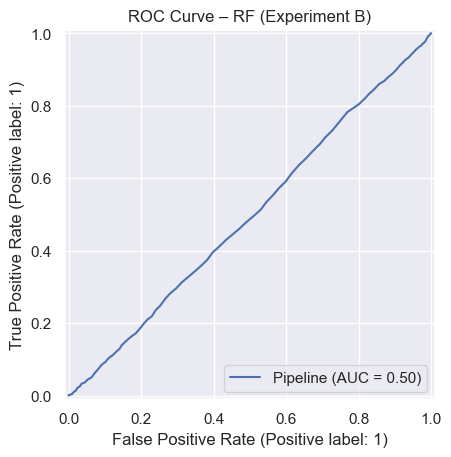

In [28]:
#Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_rf)).plot()
plt.title("Confusion Matrix – RF (Experiment B)")
plt.show()

RocCurveDisplay.from_estimator(pipe_rf, X_test, y_test)
plt.title("ROC Curve – RF (Experiment B)")
plt.show()


# Unterschied zwischen Logistic Regression und Random Forest

Die Logistic Regression ist ein lineares, gut interpretierbares Klassifikationsmodell, das vor allem bei einfach strukturierten, annähernd linear trennbaren Daten geeignet ist. Der Random Forest ist ein nichtlineares Ensemble-Modell, das komplexere Zusammenhänge abbilden kann, dafür jedoch weniger transparent ist. Logistic Regression bietet hohe Nachvollziehbarkeit, während Random Forest theoretisch mehr Flexibilität besitzt.

# Fazit: 

Die Klassifikation „High vs. Low“ scheint stark oder sogar fast vollständig von Sales_Volume bestimmt zu sein. Wenn diese Variable entfernt wird, bleiben Features übrig, die vermutlich nur schwach mit der Verkaufsperformance zusammenhängen. Außerdem hängt Sales-Erfolg in der Realität oft von Faktoren ab, die im Datensatz fehlen, z. B.:

Marketingkampagnen / Rabatte

Markt- und Konjunkturlage

Konkurrenzmodelle

Verfügbarkeit / Lieferzeiten

Regionale Präferenzen, Kundenverhalten

Modelljahr- und Ausstattungsdetails

Wenn diese Faktoren fehlen, kann selbst ein gutes Modell nur begrenzt lernen.

# 9. Feature Importance

,feature,importance
3,Price_USD,0.172196
2,Mileage_KM,0.171371
1,Engine_Size_L,0.138017
0,Year,0.076371
4,Age,0.075700
31,Fuel_Type_Petrol,0.015850
29,Fuel_Type_Electric,0.015674
28,Fuel_Type_Diesel,0.015649
30,Fuel_Type_Hybrid,0.015366
32,Transmission_Automatic,0.014526


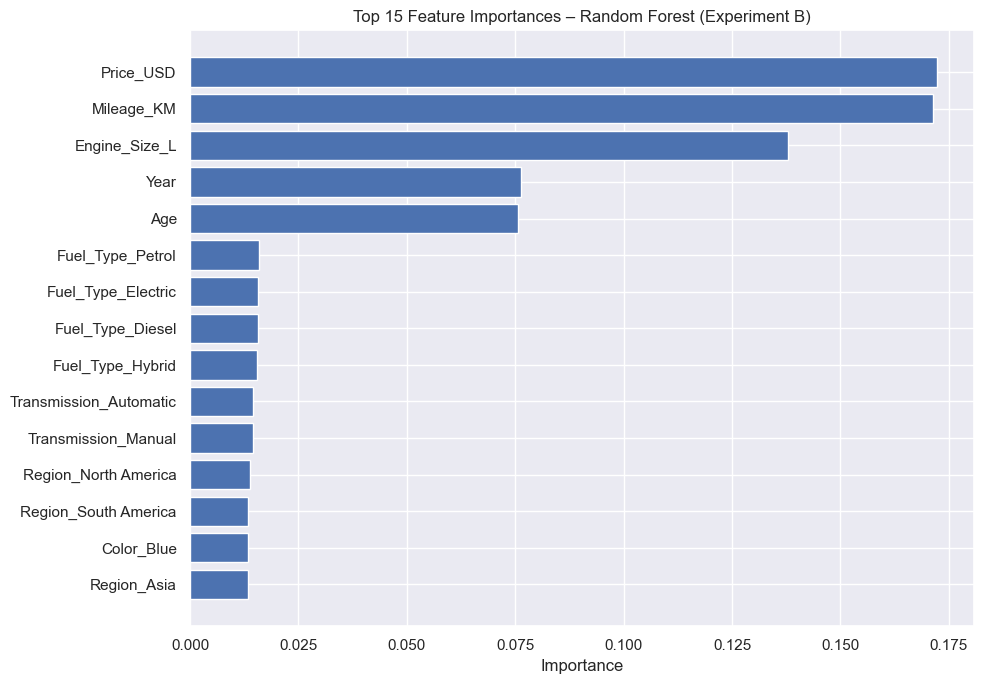

In [29]:
# Feature-Namen aus OneHotEncoder holen
ohe = pipe_rf.named_steps["preprocess"].named_transformers_["cat"]
ohe_names = ohe.get_feature_names_out(cat_cols_B)

feature_names = np.concatenate([num_cols_B, ohe_names])
importances = pipe_rf.named_steps["model"].feature_importances_

fi = pd.DataFrame({"feature": feature_names, "importance": importances})
fi = fi.sort_values("importance", ascending=False)

display(fi.head(15))

plt.figure(figsize=(10, 7))
plt.barh(fi.head(15)["feature"][::-1], fi.head(15)["importance"][::-1])
plt.title("Top 15 Feature Importances – Random Forest (Experiment B)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# Interpretation
Dieser Schritt hilft zu verstehen, welche Merkmale die Entscheidung „High vs. Low“ am stärksten beeinflussen.
Die wichtigsten Variablen können z. B. Hinweise geben, welche Modelle, Motorgrößen oder Antriebsarten besonders häufig in High-Sales fallen.

# 11. Fazit & Ausblick 

# Fazit:
In diesem Projekt wurde eine vollständige Machine-Learning-Pipeline zur Klassifikation der Verkaufsperformance (High/Low) aufgebaut. Ein zentraler Schritt war die Identifikation von Target Leakage: Die Variable Sales_Volume trennt die Zielvariable nahezu deterministisch. Um realistische Ergebnisse zu erhalten, wurden daher zwei Experimente durchgeführt. Während Experiment A (mit Sales_Volume) unrealistisch hohe Werte liefert, bildet Experiment B (ohne Sales_Volume) die praxisnähere Situation ab, in der die Verkaufsperformance nur aus Fahrzeugmerkmalen geschätzt wird.
Die Modelle Logistic Regression und Random Forest wurden anhand von Precision, Recall, F1-Score, Confusion Matrix sowie ROC-AUC evaluiert. Zusätzlich wurden Feature Importances genutzt, um die wichtigsten Einflussfaktoren zu interpretieren.

# Ausblick:
Als nächste Schritte wären Hyperparameter-Tuning, Cross-Validation sowie die Erweiterung des Datensatzes um weitere marktnahe Merkmale (z. B. Ausstattung, Zustand, Unfälle, Vorbesitzer) sinnvoll, um die Generalisierbarkeit zu verbessern.

# Hyperparameter Tuning als Verbesserung

In [30]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    average_precision_score, make_scorer,
    classification_report, roc_auc_score
)

# -----------------------------
# 1) Spaltenlisten 
# -----------------------------

cat_cols_B2 = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols_B2 = [c for c in X_train.columns if c not in cat_cols_B2]


In [31]:
# -----------------------------
# 2) Preprocessing: OneHotEncoder 
# -----------------------------
preprocess_B2_dense = ColumnTransformer(
    transformers=[
        ("num", Pipeline([("scaler", StandardScaler())]), num_cols_B2),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols_B2),
    ],
    remainder="drop"
)
#sparse 

In [32]:
# -----------------------------
# 3) Scorer: PR-AUC (Average Precision)
# -----------------------------
pr_auc_scorer = make_scorer(average_precision_score, needs_proba=True)


# Verwendung von HistGradientBoostingClassifier

In [33]:
hgb = HistGradientBoostingClassifier(random_state=42, loss="log_loss")


In [34]:
#Pipeline
pipe_hgb = Pipeline([
    ("preprocess", preprocess_B2_dense),
    ("model", hgb)
])


# Hyperparameter-Search


In [35]:
param_dist_hgb = {
    "model__learning_rate": [0.01, 0.03, 0.05, 0.1],
    "model__max_depth": [2, 3, 4, 6, None],
    "model__max_leaf_nodes": [15, 31, 63, 127],
    "model__min_samples_leaf": [20, 50, 100, 200],
    "model__l2_regularization": [0.0, 0.1, 1.0, 5.0],
}

#Test 
#print(y_train.value_counts())
#print(y_test.value_counts())
#Wir verwenden 10k Testdaten und 40k Trainingsdaten

from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

search_hgb = RandomizedSearchCV(
    pipe_hgb,
    param_distributions=param_dist_hgb,
    n_iter=30,
    scoring="average_precision",
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1,
    error_score="raise"
)

# -----------------------------
# 7) Fit + Evaluation
# -----------------------------
search_hgb.fit(X_train, y_train)

print("BESTE PARAMS (HGB):", search_hgb.best_params_)
best_hgb = search_hgb.best_estimator_

pred = best_hgb.predict(X_test)
proba = best_hgb.predict_proba(X_test)[:, 1]



print("\nREPORT (HGB tuned):")
print(classification_report(y_test, pred, digits=4, zero_division=0))
print("ROC-AUC:", roc_auc_score(y_test, proba))
print("PR-AUC:", average_precision_score(y_test, proba))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
BESTE PARAMS (HGB): {'model__min_samples_leaf': 100, 'model__max_leaf_nodes': 63, 'model__max_depth': 3, 'model__learning_rate': 0.01, 'model__l2_regularization': 5.0}

REPORT (HGB tuned):
              precision    recall  f1-score   support

           0     0.6951    1.0000    0.8201      6951
           1     0.0000    0.0000    0.0000      3049

    accuracy                         0.6951     10000
   macro avg     0.3476    0.5000    0.4101     10000
weighted avg     0.4832    0.6951    0.5701     10000

ROC-AUC: 0.49896801388003986
PR-AUC: 0.30486963527978056


# Interpretation 
Eine deutliche Verbesserung zeigt sich aber trotz fortgeschrittener Modelle und Hyperparameter-Optimierung lässt sich die Verkaufsperformance ohne leakage-nahe Variablen nicht zuverlässig vorhersagen. Dies zeigt, dass die Zielvariable primär durch externe Markt- und Nachfragefaktoren bestimmt wird, die im Datensatz nicht enthalten sind. Die Ergebnisse unterstreichen die Bedeutung sorgfältiger Feature-Auswahl und verdeutlichen, dass hohe Modellkomplexität fehlende Information nicht kompensieren kann.
Die niedrigen ROC-AUC- und PR-AUC-Werte zeigen, dass die verfügbaren Merkmale ohne leakage-nahe Informationen keine ausreichende Trenninformation für die Verkaufsperformance liefern.